In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

C:\Users\disiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


{'whiskers': [<matplotlib.lines.Line2D at 0x1f5eb507dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5eb5116d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5eb507c88>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5eb511f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5eb51a390>],
 'means': []}

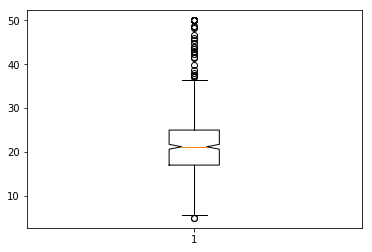

In [33]:
plt.boxplot(targets,1) #notched boxplot


(array([ 4.,  7., 10., 13., 12., 30., 28., 22., 32., 52., 51., 51., 50.,
        23., 11., 16., 14., 11., 15.,  6.,  9.,  6.,  1.,  1.,  3.,  4.,
         3.,  2.,  1., 18.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ,
        21.5, 23. , 24.5, 26. , 27.5, 29. , 30.5, 32. , 33.5, 35. , 36.5,
        38. , 39.5, 41. , 42.5, 44. , 45.5, 47. , 48.5, 50. ]),
 <a list of 30 Patch objects>)

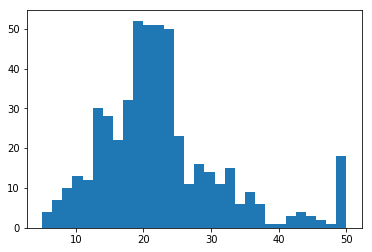

In [38]:
plt.hist(targets,30)

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cpts = pd.DataFrame(pca.transform(X_train))
x_axis = np.arange(1, pca.n_components_+1)
pca_scaled = PCA()
pca_scaled.fit(X_train_scaled)
cpts_scaled = pd.DataFrame(pca.transform(X_train_scaled))


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.841
Test data R-2 score: 0.886
Test data Spearman correlation: 0.904
Test data Pearson correlation: 0.942


Text(0.5,1,'House prices')

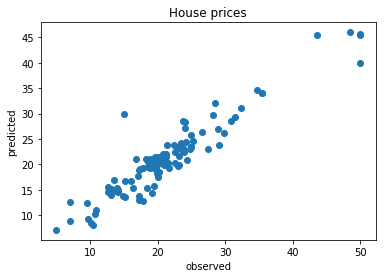

In [19]:
plt.scatter(y_test, predicted_test)
plt.xlabel('observed')
plt.ylabel('predicted')
plt.title('House prices')

In [39]:
print("end of assignment")

end of assignment
